   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion para Clasificacion)
# El objetivo de este Notebook es SOLO agregar YHat


In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1H"
NUM_FEATURES = 0

In [5]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados-regression/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

R-EURUSD_FULL_1H_49F.csv


## Read CSV

### Read Dataset From Regression

In [6]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[0], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        S3  

### Add Col 'YHat' 

In [85]:
DATASET_FULL['Class'] = 0


NEG_UNO = -0.00018
UNO = 0.00018
NEG_DOS = -0.00063
DOS = 0.00063

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_UNO, 'Class'] = -1
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >= UNO, 'Class'] = 1

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_DOS, 'Class'] = -2
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >=  DOS, 'Class'] = 2
print(DATASET_FULL.head())

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Trix_5  MACD_5_25  \
0   1.25934   1.25948  1.25814    1.25900  ...     0.0        0.0   
1   1.25942   1.25948  1.25934    1.25941  ...     0.0        0.0   
2   1.25945   1.25948  1.25927    1.25936  ...     0.0        0.0   
3   1.25934   1.25953  1.25821    1.25854  ...     0.0        0.0   
4   1.25898   1.25948  1.25829    1.25940  ...     0.0        0.0   

  MACDsign_5_25  MACDdiff_5_25  Mass_Index  Class  Sell    Sell2     Buy  \
0           0.0            0.0         0.0      0   NaN      NaN  1.25

In [86]:
DATASET_FULL['Class']

0         0
1         1
2         0
3        -2
4         2
         ..
102509    0
102510    2
102511    2
102512    0
102513    1
Name: Class, Length: 102514, dtype: int64

In [87]:
DATASET_FULL['Class'] = DATASET_FULL['Class'].shift(-1)

In [88]:
DATASET_FULL['Class'].fillna(0, inplace=True)
DATASET_FULL['Class']

0         1.0
1         0.0
2        -2.0
3         2.0
4         0.0
         ... 
102509    2.0
102510    2.0
102511    0.0
102512    1.0
102513    0.0
Name: Class, Length: 102514, dtype: float64

In [89]:
DATASET_FULL['Sell'] = np.nan
DATASET_FULL.loc[DATASET_FULL['Class'] == -1, 'Sell'] = DATASET_FULL['Close']
DATASET_FULL['Sell2'] = np.nan
DATASET_FULL.loc[DATASET_FULL['Class'] == -2, 'Sell2'] = DATASET_FULL['Close']

DATASET_FULL['Buy'] = np.nan
DATASET_FULL.loc[DATASET_FULL['Class'] == 1, 'Buy'] = DATASET_FULL['Close']
DATASET_FULL['Buy2'] = np.nan
DATASET_FULL.loc[DATASET_FULL['Class'] == 2, 'Buy2'] = DATASET_FULL['Close']

print(DATASET_FULL.head())

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Trix_5  MACD_5_25  \
0   1.25934   1.25948  1.25814    1.25900  ...     0.0        0.0   
1   1.25942   1.25948  1.25934    1.25941  ...     0.0        0.0   
2   1.25945   1.25948  1.25927    1.25936  ...     0.0        0.0   
3   1.25934   1.25953  1.25821    1.25854  ...     0.0        0.0   
4   1.25898   1.25948  1.25829    1.25940  ...     0.0        0.0   

  MACDsign_5_25  MACDdiff_5_25  Mass_Index  Class  Sell    Sell2     Buy  \
0           0.0            0.0         0.0    1.0   NaN      NaN  1.25

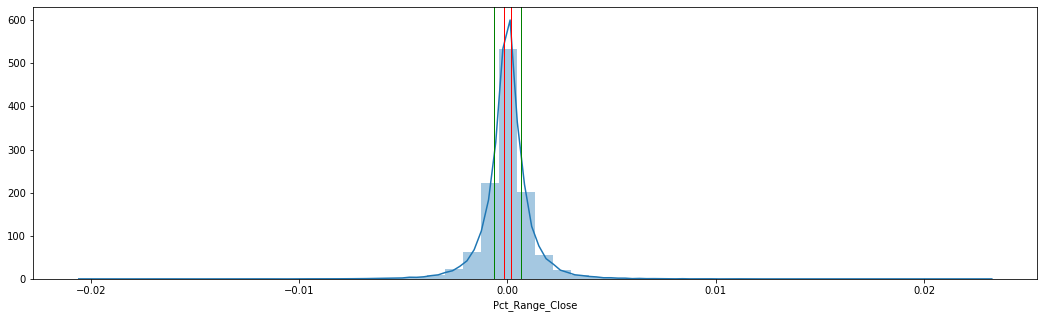

In [90]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Pct_Range_Close']);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')
plt.axvline(DOS, 0, 1, linewidth=1, color='g')
plt.axvline(NEG_DOS, 0, 1, linewidth=1, color='g')

In [91]:
DATASET_FULL['Class'].describe()

count    102514.000000
mean          0.004634
std           1.412898
min          -2.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: Class, dtype: float64

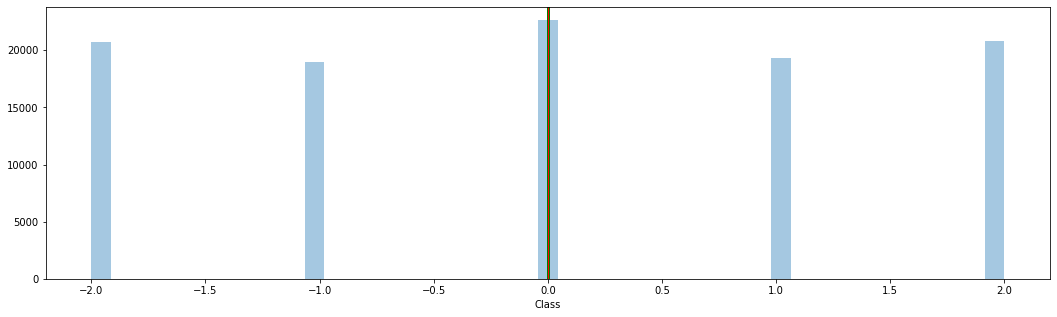

In [92]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Class'],kde=False);
plt.axvline(0.0008, 0, 1, linewidth=1, color='r')
plt.axvline(-0.0008, 0, 1, linewidth=1, color='r')
plt.axvline(0.005, 0, 1, linewidth=1, color='g')
plt.axvline(-0.005, 0, 1, linewidth=1, color='g')

In [17]:
DATASET_FULL.head(20)

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Trix_5,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index,Class,Sell,Sell2,Buy,Buy2
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.000000,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.25910,NaN
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.000000,0.0,0.0,0.0,0.0,-1.0,1.25951,NaN,NaN,NaN
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.000000,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.25869,NaN
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,2004-01-01 05:00:00,1.25907,1.25960,1.25825,1.25955,10862.5996,1.25892,1.25948,1.25807,1.25945,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,2004-01-01 06:00:00,1.25914,1.25960,1.25482,1.25948,10160.4004,1.25894,1.25948,1.25471,1.25932,...,0.000000,0.0,0.0,0.0,0.0,-1.0,1.25948,NaN,NaN,NaN
7,2004-01-01 07:00:00,1.25938,1.25950,1.24698,1.25910,13008.2002,1.25934,1.25938,1.24679,1.25900,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,2004-01-01 08:00:00,1.25900,1.25953,1.25726,1.25907,5518.8999,1.25884,1.25937,1.25710,1.25887,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9,2004-01-01 09:00:00,1.25915,1.25953,1.25864,1.25917,7611.2002,1.25905,1.25938,1.25850,1.25903,...,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [93]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'C-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

C-EURUSD_FULL_1H_54F.csv


In [94]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)